# EcoFOCIpy ADCP QC - 21BSP-2A

- mostly remove >100 cm/s flows in u/v


In [1]:
import xarray as xa
import numpy as np

import matplotlib.pyplot as plt


In [2]:
xdf = xa.load_dataset('21upp1a_0097m.nc')

In [3]:
xdf =xdf.where(xdf.u_curr_comp <=100,np.nan)
xdf

<xarray.Dataset>
Dimensions:          (latitude: 1, longitude: 1, time: 11788, depth: 19)
Coordinates:
  * time             (time) datetime64[ns] 2021-05-02 ... 2022-09-05T03:00:00
  * depth            (depth) float64 19.0 23.0 27.0 31.0 ... 79.0 83.0 87.0 91.0
  * latitude         (latitude) float64 54.33
  * longitude        (longitude) float64 -164.0
Data variables:
    u_curr_comp      (latitude, longitude, time, depth) float64 nan nan ... nan
    v_curr_comp      (latitude, longitude, time, depth) float64 nan nan ... nan
    w_curr_comp      (latitude, longitude, time, depth) float64 nan nan ... nan
    w_curr_comp_err  (latitude, longitude, time, depth) float64 nan nan ... nan
    agc1             (latitude, longitude, time, depth) float64 nan nan ... nan
    agc2             (latitude, longitude, time, depth) float64 nan nan ... nan
    agc3             (latitude, longitude, time, depth) float64 nan nan ... nan
    agc4             (latitude, longitude, time, depth) float64 nan nan ... nan
Attributes:
    Latitude_DegMMddW:                      54 20.00 N
    Longitude_DegMMddN:                     164 01.830 W
    MooringID:                              21UPP-1A
    platform_deployment_date:               2021-05-17T17:17:34Z
    platform_deployment_cruise_name:        DY2103
    platform_recovery_date:                 2022-09-03T03:00:00Z
    platform_recovery_cruise_name:          AQ2201
    platform_deployment_recovery_comments:  
    WaterDepth:                             103.0
    date_created:                           2022-11-22T10:12:20Z
    date_modified:                          
    QC_indicator:                           unknown

In [4]:
# xdf['history'] = xdf.history + 'QC of high u/v values'

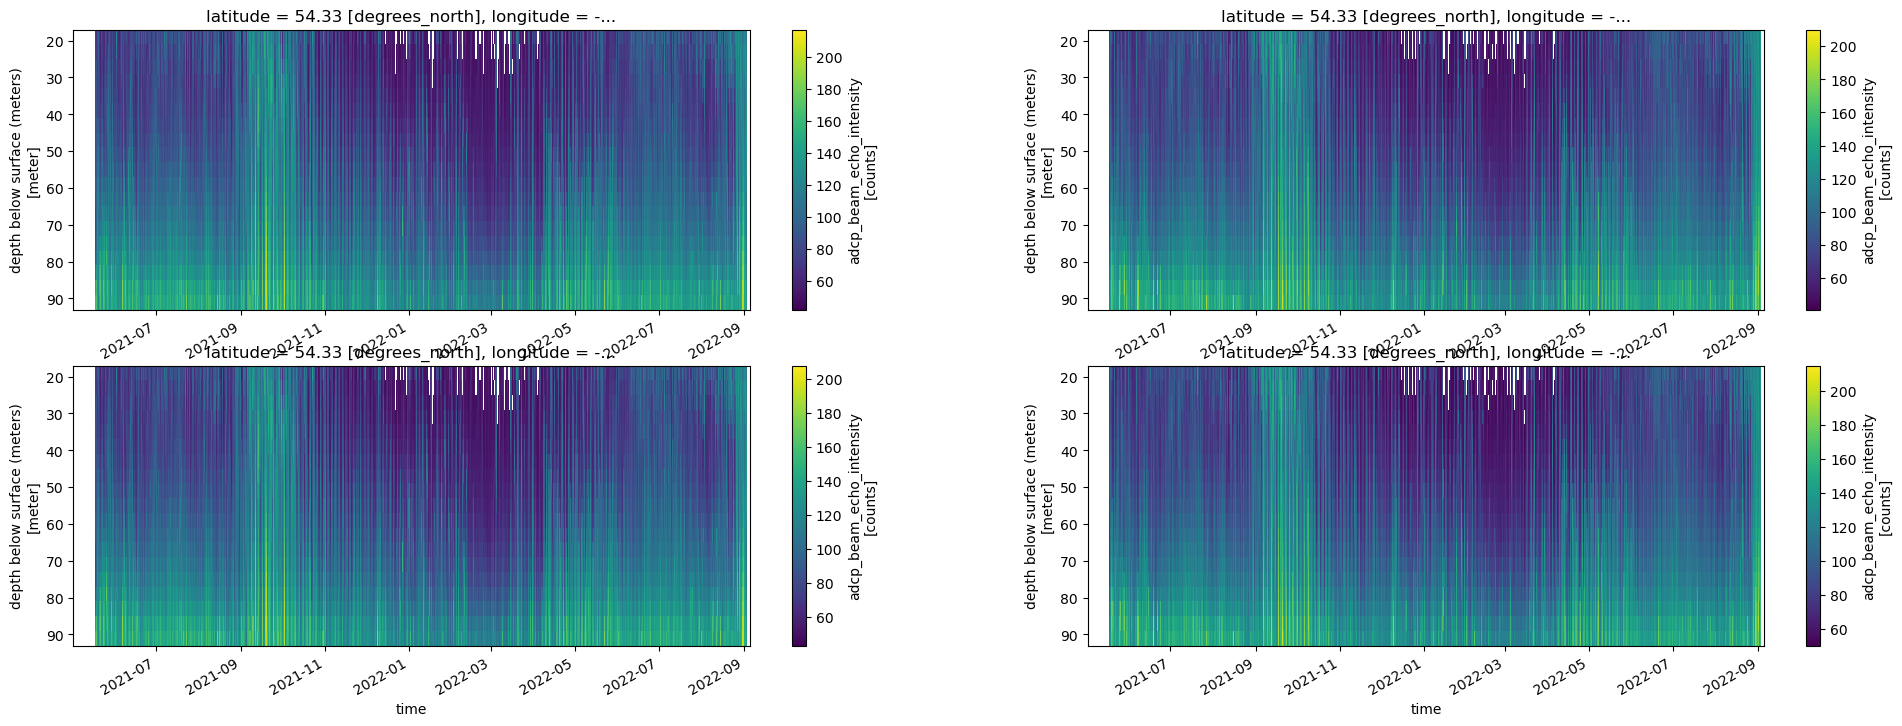

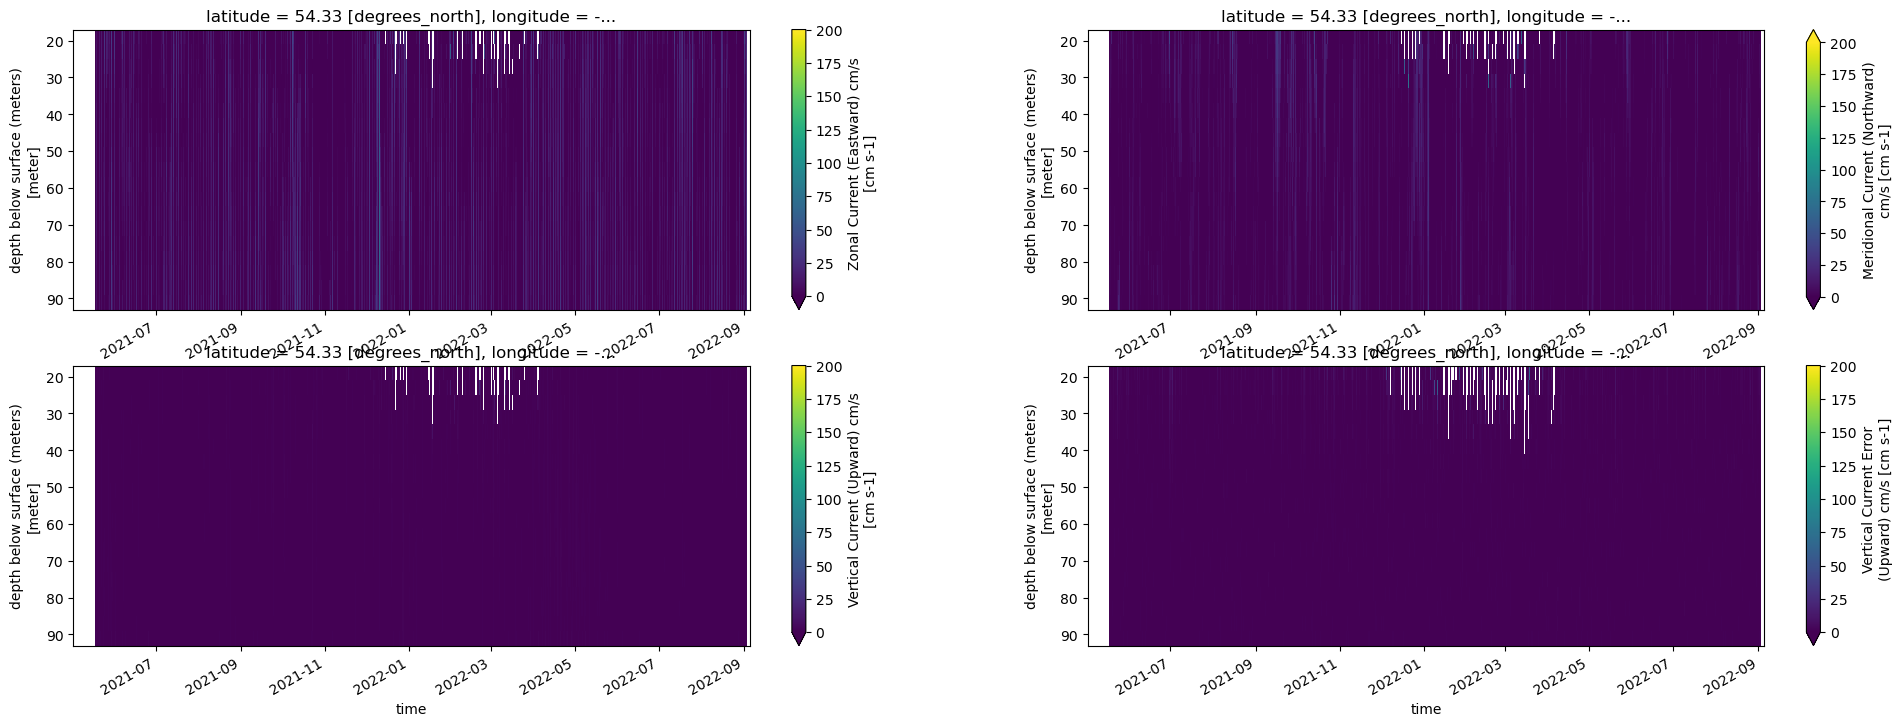

In [5]:
#optional plotting

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    xdf['agc1'].T.plot(ax=axes[0,0], yincrease=False)
    xdf['agc2'].T.plot(ax=axes[0,1], yincrease=False)
    xdf['agc3'].T.plot(ax=axes[1,0], yincrease=False)
    xdf['agc4'].T.plot(ax=axes[1,1], yincrease=False)
except:
    pass

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    xdf['u_curr_comp'].T.plot(ax=axes[0,0],vmin=0, vmax=200, yincrease=False)
    xdf['v_curr_comp'].T.plot(ax=axes[0,1],vmin=0, vmax=200, yincrease=False)
    xdf['w_curr_comp'].T.plot(ax=axes[1,0],vmin=0, vmax=200, yincrease=False)
    xdf['w_curr_comp_err'].T.plot(ax=axes[1,1],vmin=0, vmax=200, yincrease=False)
except:
    pass

In [7]:
try:
    xdf.attrs['history'] = xdf.attrs['history']+'  removed U,V >100cm/s'
except:
    xdf.attrs['history'] = '  removed U,V >100cm/s'    

## Trim above surface (negative values)

In [8]:
ixdf = xdf.where(xdf.depth >=-0.).dropna(how='all',dim='depth')

In [9]:
ixdf.attrs['history'] = ixdf.attrs['history']+'  trimmed above surface'

In [10]:
ixdf.to_netcdf('21upp1a_0097m.trimmed.nc')

In [11]:
xdf = xa.load_dataset('21upp1a_0097m.trimmed.nc')

In [12]:
ixdf = xdf.interpolate_na(dim='time',max_gap='2H')

In [13]:
ixdf.attrs['history'] = ixdf.attrs['history']+'  linearly interpolated 1hour gaps'

## Interpolate over singleton missing gaps linearly

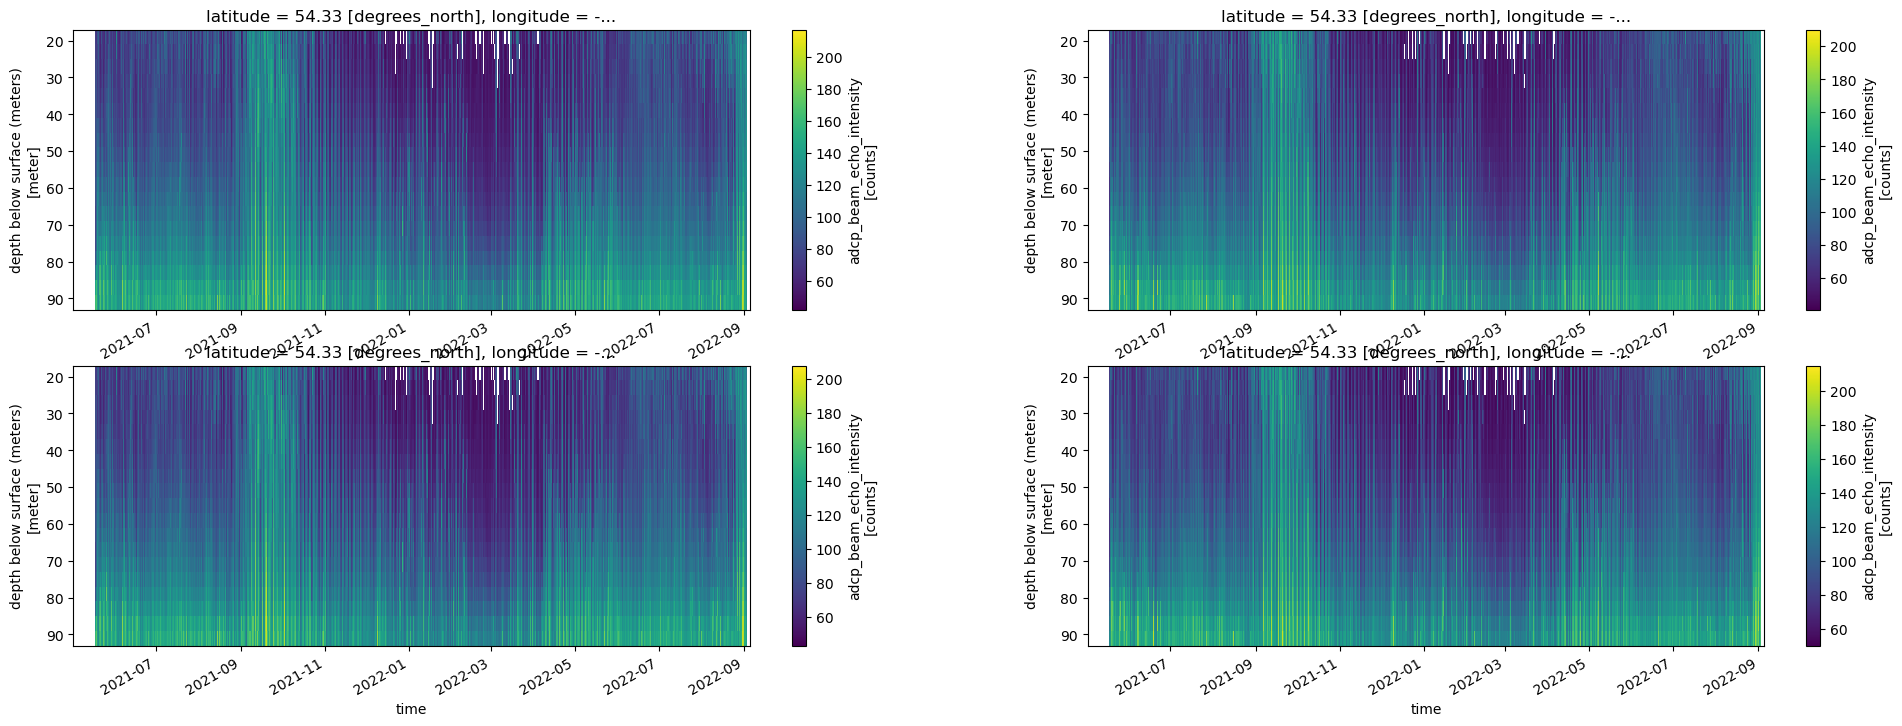

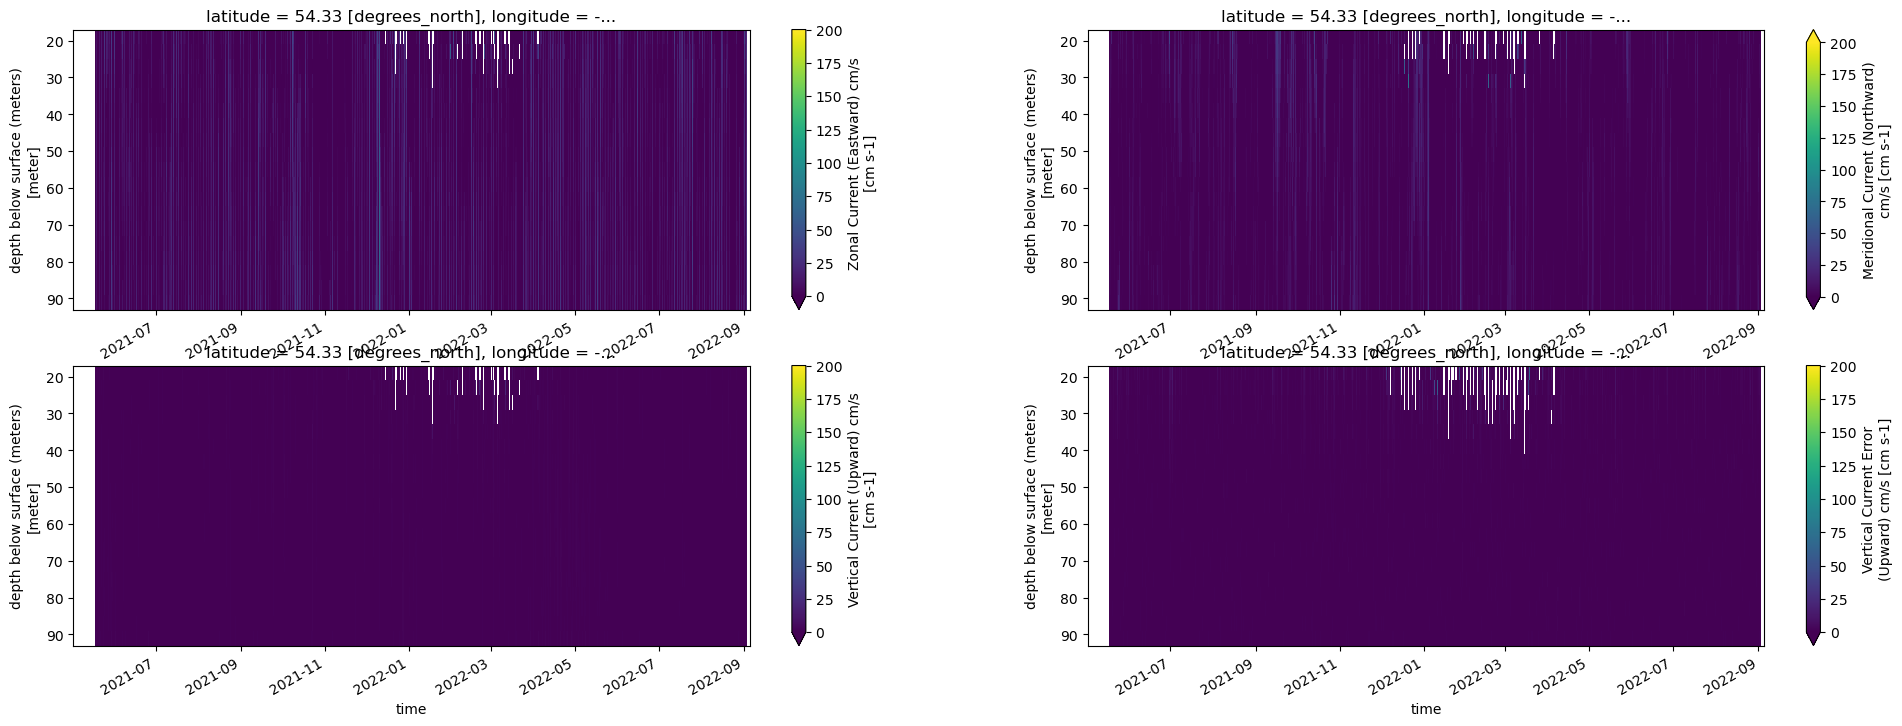

In [14]:

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    ixdf['agc1'].T.plot(ax=axes[0,0], yincrease=False)
    ixdf['agc2'].T.plot(ax=axes[0,1], yincrease=False)
    ixdf['agc3'].T.plot(ax=axes[1,0], yincrease=False)
    ixdf['agc4'].T.plot(ax=axes[1,1], yincrease=False)
except:
    pass

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    ixdf['u_curr_comp'].T.plot(ax=axes[0,0],vmin=0, vmax=200, yincrease=False)
    ixdf['v_curr_comp'].T.plot(ax=axes[0,1],vmin=0, vmax=200, yincrease=False)
    ixdf['w_curr_comp'].T.plot(ax=axes[1,0],vmin=0, vmax=200, yincrease=False)
    ixdf['w_curr_comp_err'].T.plot(ax=axes[1,1],vmin=0, vmax=200, yincrease=False)
except:
    pass

In [15]:
ixdf.to_netcdf('21upp1a_0097m.filtered.nc')